In [8]:
import datetime
from binance.client import Client 

In [10]:
client = Client(API_KEY,SECRET_KEY)

In [11]:
symbol = 'BTCUSDT'
BTC = client.get_historical_klines(symbol = symbol, interval = Client.KLINE_INTERVAL_30MINUTE, start_str="1 year ago UTC")

In [12]:
import pandas as pd 

In [13]:
BTC = pd.DataFrame(BTC, columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore'])

In [14]:
BTC['Open time'] = pd.to_datetime(BTC['Open time'], unit='ms')

In [15]:
BTC.set_index('Open time',inplace = True)

In [16]:
BTC

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2019-11-26 12:30:00,7154.63000000,7176.03000000,7100.74000000,7134.96000000,1306.60446800,1574773199999,9323962.62907039,9522,632.02437600,4510035.82740811,0
2019-11-26 13:00:00,7134.96000000,7134.96000000,7048.02000000,7080.50000000,2189.19458200,1574774999999,15509498.72254806,13642,980.58803300,6949337.32735117,0
2019-11-26 13:30:00,7081.86000000,7103.00000000,7031.00000000,7055.27000000,1630.43536200,1574776799999,11522568.50214658,10898,755.24538800,5338450.00843891,0
2019-11-26 14:00:00,7055.63000000,7107.90000000,7017.48000000,7102.48000000,2229.28237300,1574778599999,15764089.67582543,13578,1114.27667500,7882642.52558884,0
2019-11-26 14:30:00,7103.16000000,7103.16000000,7062.00000000,7068.35000000,1152.28506800,1574780399999,8158500.09384174,9125,515.77404800,3651832.62604944,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26 10:00:00,17060.81000000,17321.84000000,17058.33000000,17118.93000000,5109.96717400,1606386599999,87820277.29556221,70393,2487.12565900,42743929.35778506,0
2020-11-26 10:30:00,17118.94000000,17289.10000000,17100.55000000,17285.00000000,2955.93979700,1606388399999,50878368.23280790,48572,1477.08971400,25425936.70360608,0
2020-11-26 11:00:00,17285.00000000,17420.93000000,17253.88000000,17267.83000000,3947.30407800,1606390199999,68432046.07066832,60462,1797.92537400,31175991.19898284,0


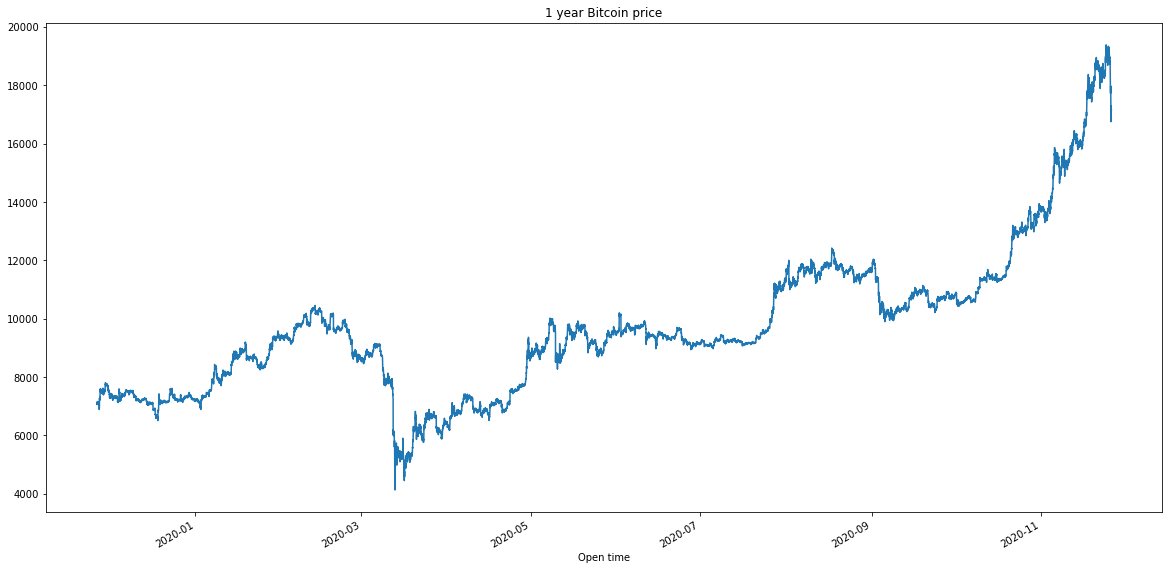

In [18]:
BTC['Close'] = BTC['Close'].astype(float)
BTC['Close'].plot(figsize=(20,10),title = '1 year Bitcoin price')

In [19]:
data = BTC.iloc[:,3:4].astype(float).values

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
data = scaler.fit_transform(data)

In [23]:
training_set = data[:10000]
test_set = data[10000:]

In [24]:
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

In [25]:
X_test = test_set[0:len(test_set)-1]
y_test = test_set[1:len(test_set)]

In [26]:
import numpy as np

In [27]:
X_train = np.reshape(X_train,(len(X_train),1,X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test),1,X_test.shape[1]))

In [28]:
import tensorflow
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 

In [30]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

In [32]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.fit(X_train, y_train, epochs = 50, batch_size = 16, shuffle = False)

Epoch 1/50
625/625 [==============================] - 5s 8ms/step - loss: 9.9968e-04
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 6.9818e-04
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 9.9391e-04
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0011
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0013
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0016
Epoch 8/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0019
Epoch 9/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0018
Epoch 10/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0017
Epoch 11/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0014
Epoch 12/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0011
Epoch 13/50
6

In [118]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(y_test)

In [119]:
new_predicted = predicted_price
mean_predicted_price = new_predicted.mean()
mean_real_price = real_price.mean()

In [120]:
import matplotlib.pyplot as plt 

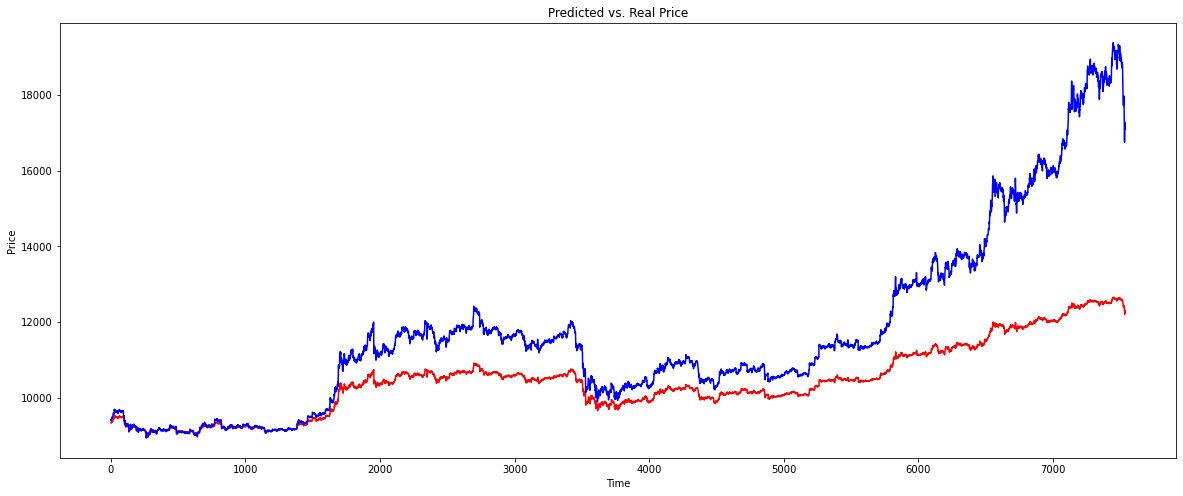

In [121]:
plt.figure(figsize=(20,8))
plt.plot(predicted_price, color = 'red',label = 'Predicted Price Of BITCOIN')
plt.plot(real_price, color = 'blue', label = 'Real Price Of BITCOIN')
plt.title('Predicted vs. Real Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()